i le projet Basique ne débute en effet qu'en 2018, débutons notre itinéraire à travers l'histoire bien plus tôt en 2010. Un projet nais alors au sein du \acrfull{rmdp}, alors encore appelé la \acrfull{ftl} nommé "Cinergie". Derrière ce nom, se rassemble une série de projet visant comme le nom l'indique à développer les synergies entre télévisions locales dont conception du journal "Vivre, Ici", co-produit par toutes les télévision du réseaux et du projet \acrshort{nepal} pour la numérisation et la centralisation des archives des médias en collaboration avec la \gls{Sonuma}.

A ceux-ci il s'ajoute le projet de recherche une solution logicielle commune pour les télévisions du réseaux afin de rapprocher leur méthodes de travaille et de facilité les échanges entre télévision. Chaque télévision à choisi et utilise ses propres solution logiciel pour ses pratique parmi une gamme de "content workflow and management plateform" et d'adaptation fait maison à l'aide notamment de tableur et de papier. Le \acrlong{rmdp} se lance alors à la recherche d'une suite de logiciel capable de répondre au attentes  et aux contraintes de toute les télévisions. Une contrainte majeur étant avant tout le budget qu'elles sont capable de rassembler. Chaque télévision reçevant en effet un budget de la Fédération Wallonie Bruxelle différent répondant à la zone qu'elle couvre.

RMDP + Synergie + RTC Liège + Védia + Télésambre + Boukè + Matélé + Tvlux + Canal Zoom + TV Com + Antenne Centre + Notélé + Bx1 (13)

RMDP + Synergie + RTC Liège + Védia + Télésambre + Boukè + Matélé + Tvlux + Canal Zoom + TV Com + Antenne Centre + Step2E + Tools On Air + Phase de test - Lenteur - Stabilité (13-2)

RMDP + Synergie + RTC Liège + Védia + Télésambre + Matélé + Tvlux + Canal Zoom + TV Com + Antenne Centre + Phase de test + Stabilité - Lenteur (12-1)

RMDP + Synergie + RTC Liège + Védia + Télésambre + Matélé + Tvlux + Canal Zoom + TV Com + Antenne Centre + Phase de test - Stabilité - Lenteur (11-2)




2018 = Synergie + RTC Liège + DB Step2E + Proof of concept de MAM

Juillet 2019 = Synergie + RTC Liège + DB Step2E + MAM + Module planning 

Synergie + RTC Liège + DB Step2E + MAM + Module planning + Module diffusion

Synergie + RTC Liège + DB Step2E + MAM + Module planning + module diffusion + module conduite

Synergie + RTC Liège + DB Step2E + MAM + Module planning + module diffusion + module conduite + module traffic

Synergie + RTC Liège + DB Step2E + MAM + Module planning + module diffusion + module conduite + module traffic + module web


https://semiotic.nteract.io/examples/isotype-chart

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
size = []
new = []
len_allies = []
last = []
already_seen = []
exploration =[]
antiprogramme = []
NAA = []  # NAA = nouveau acteurs agrégés
NAP = []  # NAP = nouveau acteurs perdus
version = []
d = {}
v = 1
naa = 0
label = []

with open('Basique.txt') as f :
    lines = f.readlines()

    for i in lines :
        lst_a = []
        lst_n = []
        nap = 0
        allié = []
        anti = []
        nouveau = []
        split = i.split(":")
        time = split[0]
        split2 = split[1].split("-//-")
        actants = split2[0].split( )
        all_anti=split2[1].split( )
        size.append(len(actants))
        NAA.append(naa)
        naa = 0
        naa_list = []
        naa_dict = {}


        # Ignore les saut de ligne (\n)
        if actants[-1] == "n" :
            actants = actant[1:-2]
        
        # Itère entre tout les actants d'une version
        for j in actants :
            # Compte les antiprogramme
            # if j[:1] == "-" :
            #     anti.append(j) 
            # else :
                if j in last and j not in lst_a :
                    naa += 1
                    naa_list.append(j)
                if j in last :
                    lst_a.append(j)
                    allié.append(j)
                    # if j in tmp_a :
                    #     naa += 1
                else :
                    lst_n.append(j)
                if j not in already_seen:
                    already_seen.append(j)
                if j not in allié :
                    nouveau.append(j)
        label.append(time)
        for k in last :
            if k not in actants :
                nap += 1   

        for i in all_anti:
            anti.append(i)

        last = actants
        new.append(len(actants)-len(allié))
        len_allies.append(len(allié))
        exploration.append(len(already_seen))
        antiprogramme.append(len(anti))
        NAP.append(nap)


        version = {"Version": time, "Allié": allié, "Nouveau": nouveau, "Antiprogramme": anti}
        d[v] = version
        v += 1




       
df = pd.DataFrame(zip(size,len_allies,new,exploration,NAP,NAA, antiprogramme), columns=["Taille","Alliés","Nouveaux","Exploration","NAP","NAA", "Anti-Programme"])



df.reset_index(inplace=True)
df["index"] += 1
# Calculer l'indice de négociation
# Plus cet indice est petit moins l'innovateur doit négocier son projet pour le maintenir en existence.
# Inversement, une valeur élevée de cet indice signifie que le projet est en grande partie renégocié. 

df['IN'] = df.apply(lambda row: row['Nouveaux'] / row['Taille'], axis = 1)


df['ANC'] = df['Nouveaux'].cumsum()
df['P'] = df['Nouveaux'].diff()


df['IR'] = df.apply(lambda row : (row['NAA'].cumsum() - row['NAP'].cumsum())/ row['Exploration'],axis = 1)

for i in range(1, len(df)):
    df.loc[i, "IS"] = df.loc[i, "Alliés"] / df.loc[i-1, "Taille"]

df.to_csv("summary.csv")

df



,index,Taille,Alliés,Nouveaux,Exploration,NAP,NAA,Anti-Programme,IN,ANC,P,IR,IS
0,1,14,0,14,14,0,0,0,1.000000,14,NaN,[0.0],NaN
1,2,14,12,2,16,2,0,2,0.142857,16,-12.0,[-0.125],0.857143
2,3,14,13,1,17,1,12,1,0.071429,17,-1.0,[0.6470588235294118],0.928571
3,4,13,12,1,18,2,13,3,0.076923,18,0.0,[0.6111111111111112],0.857143
4,5,3,1,2,20,12,12,0,0.666667,20,1.0,[0.0],0.076923
5,6,17,3,14,28,0,1,1,0.823529,34,12.0,[0.03571428571428571],1.000000
6,7,18,17,1,29,0,3,1,0.055556,35,-13.0,[0.10344827586206896],1.000000
7,8,19,17,2,30,1,17,2,0.105263,37,1.0,[0.5333333333333333],0.944444
8,9,20,19,1,31,0,17,2,0.050000,38,-1.0,[0.5483870967741935],1.000000
9,10,21,20,1,32,0,19,2,0.047619,39,0.0,[0.59375],1.000000


In [3]:
df.Taille[1]

14

In [4]:
import json



print(json.dumps(d, indent=4))

with open('version.json', 'w') as f:
    json.dump(d, f)

{
    "1": {
        "Version": "2010",
        "Alli\u00e9": [],
        "Nouveau": [
            "RMDP",
            "Synergie",
            "Tout-en-un",
            "RTC_Li\u00e8ge",
            "V\u00e9dia",
            "T\u00e9l\u00e9sambre",
            "Bouk\u00e8",
            "Mat\u00e9l\u00e9",
            "Tvlux",
            "Canal_Zoom",
            "TV_Com",
            "Antenne_Centre",
            "Not\u00e9l\u00e9",
            "Bx1"
        ],
        "Antiprogramme": []
    },
    "2": {
        "Version": "2015",
        "Alli\u00e9": [
            "RMDP",
            "Synergie",
            "Tout-en-un",
            "RTC_Li\u00e8ge",
            "V\u00e9dia",
            "T\u00e9l\u00e9sambre",
            "Bouk\u00e8",
            "Mat\u00e9l\u00e9",
            "Tvlux",
            "Canal_Zoom",
            "TV_Com",
            "Antenne_Centre"
        ],
        "Nouveau": [
            "Step2e",
            "Phase_de_test"
        ],
        "Antiprogramme": 

In [5]:
data = pd.DataFrame(d).T
data.style.to_latex("versions.tex",multirow_align="c", multicol_align="l",environment="longtable")
data.to_csv("data.csv")
data


,Version,Allié,Nouveau,Antiprogramme
1,2010,[],"[RMDP, Synergie, Tout-en-un, RTC_Liège, Védia,...",[]
2,2015,"[RMDP, Synergie, Tout-en-un, RTC_Liège, Védia,...","[Step2e, Phase_de_test]","[Lenteur, Stabilité]"
3,2017,"[RMDP, Synergie, Tout-en-un, RTC_Liège, Védia,...",[Développement_Cinergie],[Lenteur]
4,2018,"[RMDP, Synergie, Tout-en-un, RTC_Liège, Védia,...",[Step2e*],"[-Lenteur, -Stabilité, Faillite]"
5,Fin 2018,[RTC_Liège],"[DB_Step2e, MAM]",[]
6,Juillet 2019,"[RTC_Liège, DB_Step2e, MAM]","[Synergie, Tout-en-un*, Développeur_web, Expor...",[Fiche_Conduite]
7,Juillet 2021,"[Synergie, Tout-en-un*, RTC_Liège, DB_Step2e, ...",[Module_diffusion],[Fiche_Conduite]
8,Aout 2021,"[Synergie, RTC_Liège, DB_Step2e, MAM, Développ...","[Tout-en-un, Module_traffic]","[Fiche_Conduite, Boucles_Publicitaires]"
9,Fin 2021,"[Synergie, Tout-en-un, RTC_Liège, DB_Step2e, M...",[Module_web],"[Fiche_Conduite, Boucles_Publicitaires]"
10,2022,"[Synergie, Tout-en-un, RTC_Liège, DB_Step2e, M...",[VueJS],"[Fiche_Conduite, Boucles_Publicitaires]"


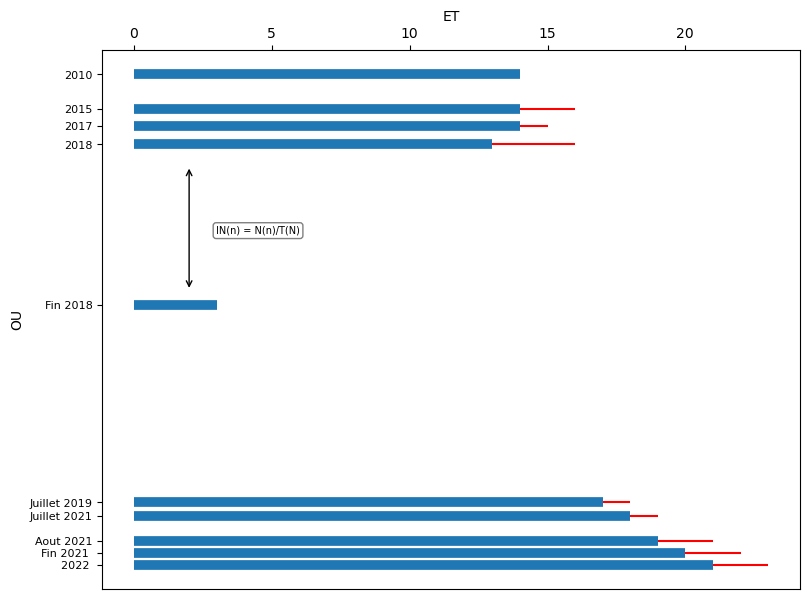

In [6]:
%matplotlib inline


labels = data.Version.tolist()


fig, ax = plt.subplots(figsize=(9,7))

ax.text(
    4.5, 1.65, "IN(n) = N(n)/T(N)", ha="center", va="center", rotation=0, size=7,
    bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="grey", lw=1))

ax.annotate("",
            xy=(2, 1.38), xycoords='data',
            xytext=(2, 1.9), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )

ax.xaxis.tick_top()
ax.set_xlabel("ET")
ax.xaxis.set_label_position('top') 
ax.set_ylabel("OU")
ax.invert_yaxis() 
ax.set_yticks(df["IN"].cumsum(), labels=labels, size=8)

ax = plt.hlines(xmin = 0, xmax = df["Taille"], y = df["IN"].cumsum(), linewidth=7)
ax = plt.hlines(xmin = df["Taille"], xmax = (df["Taille"] + df["Anti-Programme"]), y = df["IN"].cumsum(), colors="red")


# fig.tight_layout()
plt.savefig("graphIN.svg",facecolor='w', dpi=300)

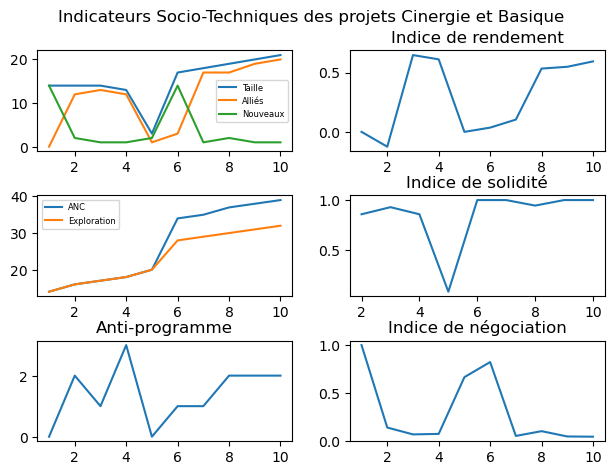

In [7]:

fig, ax = plt.subplots(3,2)
fig.suptitle('Indicateurs Socio-Techniques des projets Cinergie et Basique')
fig.tight_layout()



ax[0,0].plot(df["index"], df["Taille"], label = "Taille")
ax[0,0].plot(df["index"], df["Alliés"], label = "Alliés")
ax[0,0].plot(df["index"], df["Nouveaux"], label = "Nouveaux")
ax[0,0].legend(loc=7, prop={'size': 6})
# df.plot(x = "index", y = ["Taille","Alliés","Nouveaux"])
# df.plot(x = "index", y = ["ANC", "Exploration"])

ax[1,0].plot(df["index"], df["ANC"], label = "ANC")
ax[1,0].plot(df["index"], df["Exploration"], label = "Exploration")
ax[1,0].legend(loc=2, prop={'size': 6})

ax[2,0].plot(df["index"], df["Anti-Programme"], label = "Anti-Programme")
ax[2,0].set_title('Anti-programme')

ax[0,1].plot(df["index"], df['IR'])
ax[0,1].set_title('Indice de rendement')

ax[1,1].plot(df["index"], df['IS'])
ax[1,1].set_title("Indice de solidité")

ax[2,1].plot(df["index"], df['IN'])
ax[2,1].set_title("Indice de négociation")


plt.savefig("indicateurs.png",facecolor='w', dpi=300)

/tmp/ipykernel_31921/1564995998.py:13: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


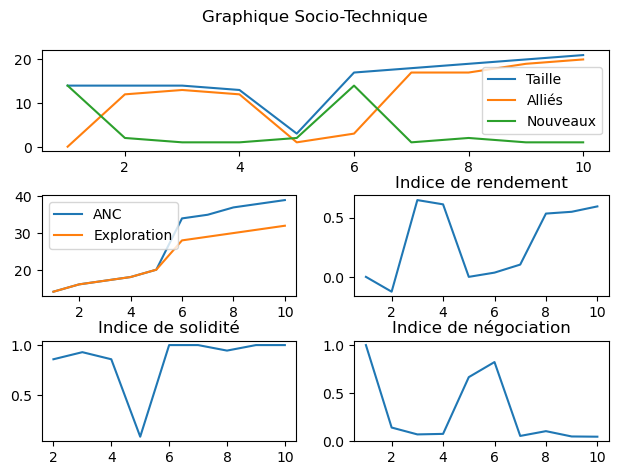

In [8]:
mosaic = """
    AA
    BC
    DE
    """


fig = plt.figure(constrained_layout=True)
ax_dict = fig.subplot_mosaic(mosaic)


fig.suptitle('Graphique Socio-Technique')
fig.tight_layout()


ax_dict["A"].plot(df["index"], df["Taille"], label = "Taille")
ax_dict["A"].plot(df["index"], df["Alliés"], label = "Alliés")
ax_dict["A"].plot(df["index"], df["Nouveaux"], label = "Nouveaux")
ax_dict["A"].legend()
# df.plot(x = "index", y = ["Taille","Alliés","Nouveaux"])
# df.plot(x = "index", y = ["ANC", "Exploration"])

ax_dict["B"].plot(df["index"], df["ANC"], label = "ANC")
ax_dict["B"].plot(df["index"], df["Exploration"], label = "Exploration")
ax_dict["B"].legend()

# ax_dict[2,0].plot(df["index"], df["Anti-Programme"], label = "Anti-Programme")
# ax_dict[2,0].set_title('Anti-programme')

ax_dict["C"].plot(df["index"], df['IR'])
ax_dict["C"].set_title('Indice de rendement')

ax_dict["D"].plot(df["index"], df['IS'])
ax_dict["D"].set_title("Indice de solidité")

ax_dict["E"].plot(df["index"], df['IN'])
ax_dict["E"].set_title("Indice de négociation")


plt.savefig("indicateurs2.png",facecolor='w', dpi=300)

/tmp/ipykernel_31921/1921292220.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(label)


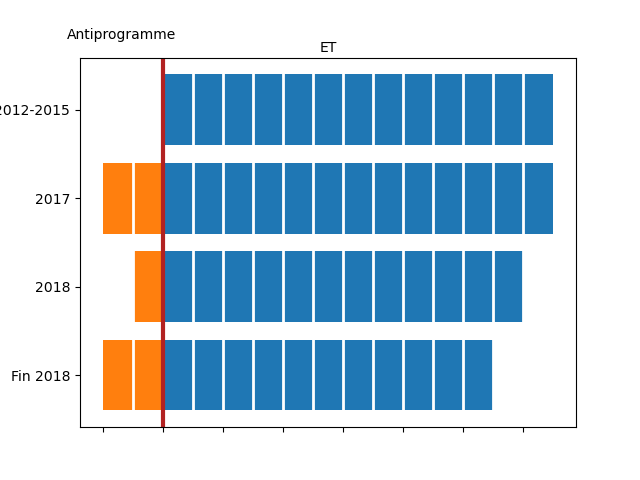

In [9]:
%matplotlib widget

import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

version = [0,1,2,3]
programme = [13,13,12,11]
antiprogramme = [0,-2,-1,-2]
label = ["2010","2012-2015","2017","2018","Fin 2018",]


fig, ax = plt.subplots()
fig.patch.set_facecolor('w')

# for ver in version:
#     for pro in programme:
#         plt.barh(y=ver, width = pro)
    # for ant in antiprogramme:
    #     plt.barh(y=ver, width = ant)

plt.barh(y=version, width = programme)
plt.barh(y=version, width = antiprogramme)
for pro in range(0,max(programme)):
    ax.axvline(pro, color='w', linewidth=2)

for anti in range(0,min(antiprogramme),-1):
    ax.axvline(-abs(anti), color='w', linewidth=2)

ax.axvline(0, color='firebrick', linewidth=3)

ax.invert_yaxis()
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.set_yticklabels(label)
ax.set_ylabel('OU')
ax.set_xlabel('ET')
ax.text(-3.2, -0.8, 'Antiprogramme')

ax.set_xticklabels( () )
ax.xaxis.set_label_position('top')


plt.savefig("graph1.png", bbox_inches='tight')
plt.show()